### Code used for the spatial daily water-balance computation using PCRaster:

#### This code is divided in two parts: 

#### (a) The first part shows some examples regarding the conversion and pre-processing of some of the dataset that will be used for the model computation:

The code will read a total of Z .map files, and will reshape each file from a (X, Y) to a (1, X * Y), and will assing each file matrix to a different line. Therefore we will have a time-series matrix of (Z, X * Y) shape. 

Since the full raster matrix is too big, a clone map mask is used to convert just the grids that are from rivers and streams in the map, reducing the number of columns. 

Developed by: Vitor Cantarella

Adjusted by: Thiago Nascimento

In [1]:
from osgeo import gdal, gdalconst
import pcraster as pcraster
import os
import numpy as np
from pcraster import *
print(os.getcwd())

C:\Users\User\OneDrive\Projects\Y2023\arusha_recharge\MarinhaGrande\Model\Model5_2018burnt


Now you import the waterbalancemodel:

In [2]:
import waterbalancemodel as wbm

#### (a) Pre-processing of the data:

For this water-balance computation one needs: 
1. Landuse map;
2. Soil types map;
3. DEM map;
4. Slope map;
5. Lookup table of runoff threshould according to each landuse class;
6. Lookup table of soil field capacity (FC) according to each soil type class;
7. Lookup table of soil extension depth (root depth) according to each landuse class;
8. Lookup table of crop coefficient according to each land use class;
9. Lookup table of initial soil storage capacity (50%) according to each landuse class.  
10. Time series of precipitation and potential evapotrasnpiration. 

#### Observations: 
#### (1) The lookup tables and the time-series of precipitation and PET should be provided following the standard format provided in this tutorial; 
#### (2) Usually the maps are provided in a GeoTif formart, therefore the code below shows an example of how to convert it;
#### (3) During the pre-processing it is essential to assing the same projection system, the same resolution, and that all the maps are in the same limits.

#### Function to convert a GeoTif to PCraster:

In [ ]:
def ConvertToPCRaster(src_filename,dst_filename,ot,VS):
    #Open existing dataset
    src_ds = gdal.Open(src_filename)
    
    #GDAL Translate
    dst_ds = gdal.Translate(dst_filename, src_ds, format='PCRaster', outputType=ot, metadataOptions=VS)
    
    #Properly close the datasets to flush to disk
    dst_ds = None
    src_ds = None

In [ ]:
ConvertToPCRaster("Data/Data/gis/landuse.tif","Data/Data/gis/landuse.map",gdalconst.GDT_Int32,"VS_NOMINAL")

Plot of the converted maped area:

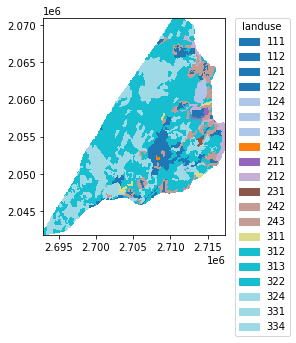

In [10]:
landuse = pcraster.readmap("LULC Input/landuse.map")
pcraster.plot(landuse)

#### (b). Computation of the water-balance for the scenario before the fires (2001-2017):

In order to use the waterbalancemodel, one should organize the directory with the following folders:
1. Climate Data: with a file for daily precipitation and another for daily PET;
2. LULC Input: with the landuse.map file;
3. Other input: with all the other .map and .tbl files;
4. Output: an empty folder

In [4]:
myModel = wbm.RechargeModel("LULC Input/landuse.map", start_date = '2018-10-01', final_date = '2020-09-30')
dynModelFw = wbm.DynamicFramework(myModel, lastTimeStep = 731, firstTimestep = 1)
dynModelFw.run()

...........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0